In [139]:
#references:
#https://snap.stanford.edu/data/com-Amazon.html
#https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.label_propagation.asyn_lpa_communities.html

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community

In [11]:
G = nx.read_edgelist('./com-amazon.ungraph.txt')

In [6]:
len(G)

334863

In [177]:
#miscellaneous functions

def Xi_v(x,v):
    return int(x==v)



def push(u, p, r, alpha = 0.2):
    r_ = np.copy(r)
    
    p[int(u)-1] = p[int(u)-1] + alpha*r[int(u)-1]
    r_[int(u)-1] = (1-alpha)*r[int(u)-1]/2
    
    for i,j in G.edges(u):   #j corresponds to nodes from u i.e. (u,j) in E
        r_[int(j)-1] = r[int(j)-1] + (1-alpha)*r[int(u)-1]/(2*G.degree(u))
    
    return [p,r_]
    
def ApproximatePageRank(v, alpha = 0.2, epselon = 0.005):
    np.random.seed(0)
    n = np.max(np.int64(nx.nodes(G)))
    p = np.zeros(n)
    r = np.zeros(n)
    r[int(v)-1] = 1
    
    while max([r[int(u_)-1]/G.degree(u_) for u_ in nx.nodes(G)])>=epselon:
        chosen_vertex = []
        
        for u__ in nx.nodes(G):
            if r[int(u__)-1]/G.degree(u__) >= epselon:
                chosen_vertex.append(u__)
        u__ = np.random.choice(chosen_vertex)
        p,r = push(u__, p, r)
    return p

In [214]:
##page_rank_vector 
start_nodes = ['143608','243284','152623','533768','59217']

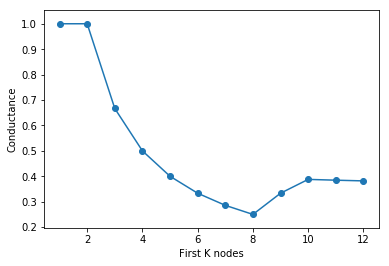

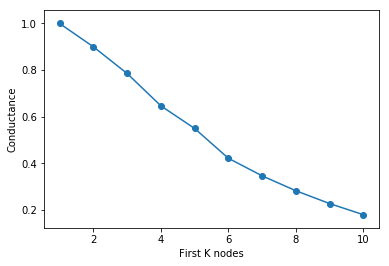

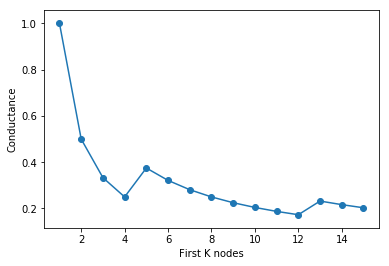

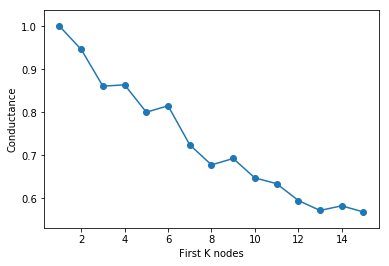

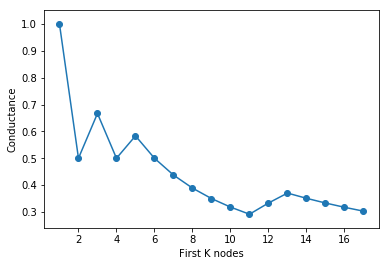

In [213]:
support_nodes_total = {}
for s in start_nodes:
    q = ApproximatePageRank(s)
    support_nodes = []
    tmp = []

    for i,j in enumerate(q):
        if j!=0:
            support_nodes.append(i)
            tmp.append(j/G.degree(str(i+1)))

    tmp1 = np.copy(tmp)
    tmp1 = np.sort(tmp1)
    support_nodes_ = [support_nodes[tmp.index(i)] for i in tmp1]
    
    support_nodes_total[s]=support_nodes_
    
    k = range(1,np.count_nonzero(q))
    conductance = []
    for i in k:
        S = [str(j+1) for j in support_nodes_[:i]]  #first k nodes
        conductance.append(nx.conductance(G, S))
    plt.xlabel("First K nodes")
    plt.ylabel("Conductance")
    plt.scatter(k, conductance)
    plt.plot(k, conductance)
    plt.show()

The graphs correspond to seeds : '143608',     '243284',    '152623',   '533768',   '59217'

### Precision of each S$_k$ in terms of the community of start node

In [186]:
communities = open('./com-amazon.all.dedup.cmty.txt', 'r').readlines()

In [187]:
communities[0][:-1]

'100005\t127545\t202036\t257630\t362970\t376927\t429080'

### For other values of starting seed

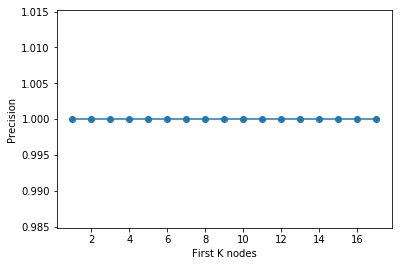

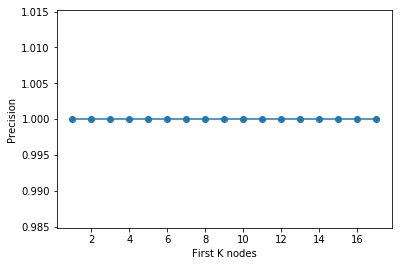

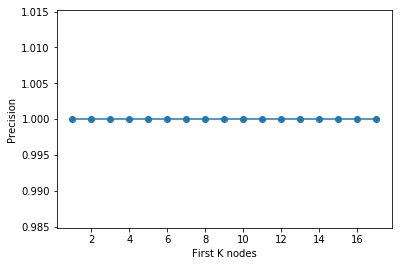

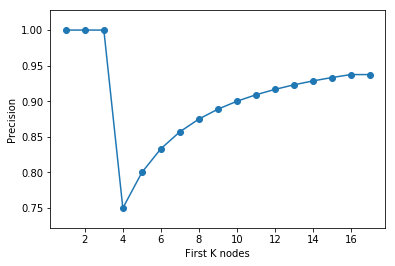

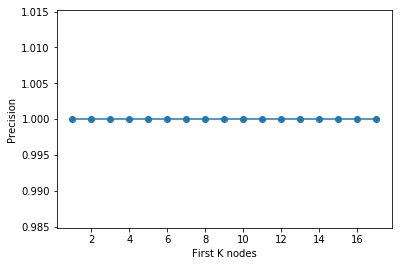

In [215]:
for s in start_nodes:
    s_comm = [] #the community to which s belongs
    support_nodes_1 = support_nodes_total[s]
    for i in communities:
        members = i[:-1].split('\t')
        if s in members:
            s_comm.extend(members)
    precision = []
    for i in k:
        S = [str(j+1) for j in support_nodes_1[:i]]  #first k nodes
        count =  0
        for j in S:
            if j in s_comm:
                count+=1
        precision.append(count/len(S))
    plt.xlabel("First K nodes")
    plt.ylabel("Precision")
    plt.scatter(k, precision)
    plt.plot(k, precision)
    plt.show()

The graphs correspond to seeds : '143608',     '243284',    '152623',   '533768',   '59217'